In [1]:
%autosave 0

Autosave disabled


In [2]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns
from env import get_connection

First, we have to read in the data from Codeup's tsa_item_demand database.

In [3]:
query = '''
        SELECT  sale_date, sale_amount, item_brand, item_name, item_price, 
        store_address, store_zipcode, store_city, store_state
        FROM sales
        LEFT JOIN items USING(item_id)
        LEFT JOIN stores USING(store_id)
        ;
        '''


In [4]:
url = get_connection('tsa_item_demand')

In [5]:
df = pd.read_sql(query,url)

In [6]:
# df.to_csv('tsa_items')

In [7]:
df.shape

(913000, 9)

In [8]:
df.isna().sum()

sale_date        0
sale_amount      0
item_brand       0
item_name        0
item_price       0
store_address    0
store_zipcode    0
store_city       0
store_state      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   sale_amount    913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   store_address  913000 non-null  object 
 6   store_zipcode  913000 non-null  object 
 7   store_city     913000 non-null  object 
 8   store_state    913000 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 62.7+ MB


### 1. Convert date column to datetime format.

In [10]:
df.sale_date = pd.to_datetime(df.sale_date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   sale_date      913000 non-null  datetime64[ns]
 1   sale_amount    913000 non-null  int64         
 2   item_brand     913000 non-null  object        
 3   item_name      913000 non-null  object        
 4   item_price     913000 non-null  float64       
 5   store_address  913000 non-null  object        
 6   store_zipcode  913000 non-null  object        
 7   store_city     913000 non-null  object        
 8   store_state    913000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 62.7+ MB


### 2. Plot the distribution of sale_amount and item_price.

In [11]:
df.head(2)

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


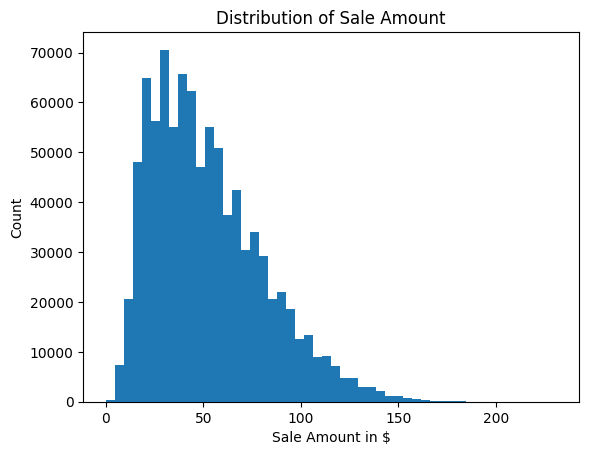

In [12]:
plt.hist(df.sale_amount, bins =50)
plt.xlabel('Sale Amount in $')
plt.ylabel('Count')
plt.title('Distribution of Sale Amount')
plt.show()

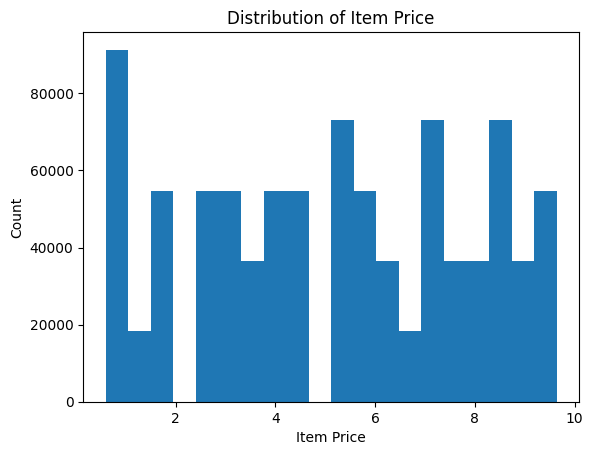

In [13]:
plt.hist(df.item_price, bins =20)
plt.xlabel('Item Price')
plt.ylabel('Count')
plt.title('Distribution of Item Price')
plt.show()

### 3. Set the index to be the datetime variable.

In [14]:
df.head(2)

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [15]:
df = df.set_index('sale_date')

In [16]:
df.head(2)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX


In [17]:
df = df.sort_values('sale_date')

In [18]:
df.head(2)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state
sale_date,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX


### 4. Add a 'month' and 'day of week' column to your dataframe.

In [19]:
df['month']= df.index.month_name()
df.head(2)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January


In [20]:
df['day_of_week'] = df.index.day_name()
df.head(2)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [21]:
df['sales_total']=df.sale_amount * df.item_price
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,month,day_of_week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,San Antonio,TX,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,San Antonio,TX,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,San Antonio,TX,January,Tuesday,294.00


### 6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [ ]:
# All funcitons are saved in prepare.py file

In [22]:
def tsa_import():
    '''
    imports all features from sales, items, and stores tables from 
    `tsa_item_demand` from the codeup SQl server
    minus item and store ids
    '''
    filename = 'tsa_items'
    
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    
    else:
        query = '''
        SELECT  sale_date, sale_amount, item_brand, item_name, item_price, 
        store_address, store_zipcode, store_city, store_state
        FROM sales
        LEFT JOIN items USING(item_id)
        LEFT JOIN stores USING(store_id)
        ;
        '''
        url = get_connection('tsa_item_demand')
        df = pd.read_sql(query,url)
        df.to_csv(filename, index=False)
        
        return df

In [23]:
def convert_datetime(df):
    '''
    converts date colum to date time object and sets it as index. 
    sorts df by date time object
    '''
    df.sale_date = pd.to_datetime(df.sale_date)
    df = df.sort_values('sale_date')
    df = df.set_index('sale_date')
    
    return df

In [24]:
def prep_tsa(df):
    '''
    creates columns in the tsa df.
    '''
    df['month']= df.index.month_name()
    df['day_of_week'] = df.index.day_name()
    df['sales_total']=df.sale_amount * df.item_price
    
    return df
    

In [25]:
def tsa_item_demand_pipeline():
    '''
    runs the tsa pipeline
    '''
    tsa_import()
    convert_datetime(df)
    prep_tsa(df)
    
    return df